In [2]:
from mesa.batchrunner import batch_run
import numpy as np
from model import StrategyModel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# parameter 1: social volatility ~ individual gain

param_values = {"key_change": np.arange(0, 1.01, 0.05)}

results = batch_run(
    StrategyModel,
    parameters=param_values,
    iterations=10,
    max_steps=100
)

results_df = pd.DataFrame(results)

print(results_df.keys())

  0%|          | 0/210 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/mesa/experimental/cell_space/property_layer.py:226: FutureWarning: The property layer functionality and associated classes are experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1932
  layer = PropertyLayer(
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<frozen _collections_abc>:616: UserWarning: Random number generator not specified, this can make models non-reproducible. Please pass a random number generator explicitly


Index(['RunId', 'iteration', 'Step', 'key_change', 'Horizontal_Avg_Gain',
       'Vertical_Avg_Gain', 'Total_Gain', 'Accumulated_Gain',
       'Horizontal Final Average', 'Vertical Final Average'],
      dtype='object')


In [ ]:
# 21 (key change parameter) * 10(iteration) = 210 rows
results_df.head(5)

,RunId,iteration,Step,key_change,Horizontal_Avg_Gain,Vertical_Avg_Gain,Total_Gain,Accumulated_Gain,Horizontal Final Average,Vertical Final Average
0,0,0,100,0.00,15.272727,15.558442,4748,94190,13.817515,14.052559
1,1,0,100,0.05,15.019481,15.000000,4623,93063,13.662355,13.890424
2,2,0,100,0.10,15.168831,15.331169,4697,92749,13.750315,13.770726
3,3,0,100,0.15,15.162338,14.759740,4608,92804,13.721641,13.802196
4,4,0,100,0.20,14.636364,14.610390,4504,91380,13.710490,13.508971


In [22]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RunId                     210 non-null    int64  
 1   iteration                 210 non-null    int64  
 2   Step                      210 non-null    int64  
 3   key_change                210 non-null    float64
 4   Horizontal_Avg_Gain       210 non-null    float64
 5   Vertical_Avg_Gain         210 non-null    float64
 6   Total_Gain                210 non-null    int64  
 7   Accumulated_Gain          210 non-null    int64  
 8   Horizontal Final Average  210 non-null    float64
 9   Vertical Final Average    210 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 16.5 KB


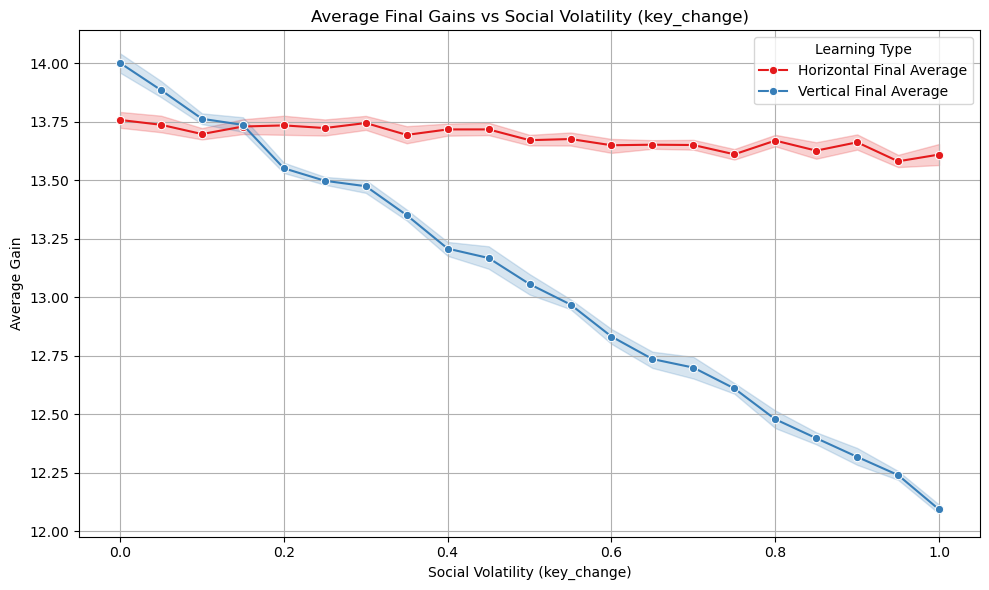

In [9]:
plot_df = results_df.melt(id_vars= ['key_change','iteration'],
                      value_vars=['Horizontal Final Average', 'Vertical Final Average'],
                      var_name='Learning Type',
                      value_name='Average Gain')

plt.figure(figsize=(10,6))
sns.set_palette(['#e41a1c', '#377eb8']) 
sns.lineplot(data=plot_df,
             x='key_change',
             y='Average Gain',
             hue='Learning Type',
             marker='o',
             errorbar='ci')

plt.title('Average Final Gains vs Social Volatility (key_change)')
plt.xlabel('Social Volatility (key_change)')
plt.ylabel('Average Gain')
plt.grid(True)
plt.legend(title='Learning Type')
plt.tight_layout()

plt.savefig("final_gains_vs_key_change_with_cierrorbar.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# parameter 2: horizontal agent percentage ~ global wealth acculmulation

param_values_2 = {"horizontal_ratio": np.arange(0, 1.01, 0.05)}

results_2 = batch_run(
    StrategyModel,
    parameters=param_values_2,
    iterations=10,
    max_steps=100
)

results_df_2 = pd.DataFrame(results_2)

print(results_df_2.keys())


  0%|          | 0/210 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<frozen _collections_abc>:616: UserWarning: Random number generator not specified, this can make models non-reproducible. Please pass a random number generator explicitly


Index(['RunId', 'iteration', 'Step', 'horizontal_ratio', 'Horizontal_Avg_Gain',
       'Vertical_Avg_Gain', 'Total_Gain', 'Accumulated_Gain',
       'Horizontal Final Average', 'Vertical Final Average'],
      dtype='object')


In [ ]:
# 21 (key change parameter) * 10(iteration) = 210 rows
results_df_2.head(5)

,RunId,iteration,Step,horizontal_ratio,Horizontal_Avg_Gain,Vertical_Avg_Gain,Total_Gain,Accumulated_Gain,Horizontal Final Average,Vertical Final Average
0,0,0,100,0.00,0.000000,12.964286,3993,79260,0.000000,12.431800
1,1,0,100,0.05,13.200000,12.515358,3865,79514,13.564333,12.378573
2,2,0,100,0.10,15.133333,12.784173,4008,80355,13.624856,12.413766
3,3,0,100,0.15,15.152174,12.793893,4049,81040,13.579761,12.448549
4,4,0,100,0.20,15.327869,12.914980,4125,81932,13.716266,12.483336


In [24]:
results_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RunId                     210 non-null    int64  
 1   iteration                 210 non-null    int64  
 2   Step                      210 non-null    int64  
 3   horizontal_ratio          210 non-null    float64
 4   Horizontal_Avg_Gain       210 non-null    float64
 5   Vertical_Avg_Gain         210 non-null    float64
 6   Total_Gain                210 non-null    int64  
 7   Accumulated_Gain          210 non-null    int64  
 8   Horizontal Final Average  210 non-null    float64
 9   Vertical Final Average    210 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 16.5 KB


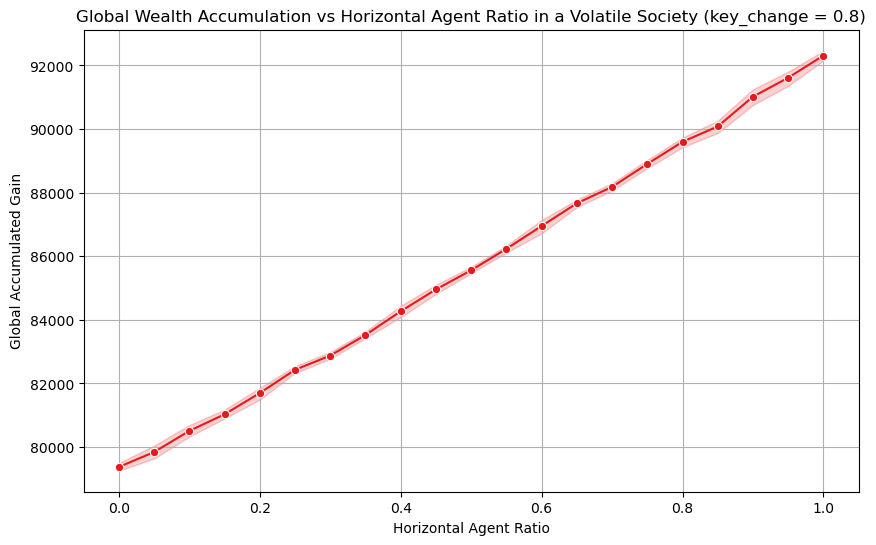

In [26]:
plt.figure(figsize=(10,6))
sns.set_palette(['#e41a1c']) 
sns.lineplot(
    data=results_df_2, 
    x='horizontal_ratio',
    y='Accumulated_Gain',
    marker='o',
    errorbar='ci'
)

plt.title('Global Wealth Accumulation vs Horizontal Agent Ratio in a Volatile Society (key_change = 0.8)')
plt.xlabel('Horizontal Agent Ratio')
plt.ylabel('Global Accumulated Gain')
plt.grid(True)

plt.savefig("global_gain_vs_horizontal_ratio_ci.png", dpi=300, bbox_inches='tight') 
plt.show()


In [7]:
# parameter 3: key_change + horizontal ratio ~ global wealth acculmulation

param_values_3 = {"horizontal_ratio": np.arange(0, 1.01, 0.2),
                  "key_change": [0, 0.3, 0.6, 0.9]
                  }

results_3 = batch_run(
    StrategyModel,
    parameters=param_values_3,
    iterations=10,
    max_steps=100
)

results_df_3 = pd.DataFrame(results_3)

print(results_df_3.keys())


  0%|          | 0/240 [00:00<?, ?it/s]

Index(['RunId', 'iteration', 'Step', 'horizontal_ratio', 'key_change',
       'Horizontal_Avg_Gain', 'Vertical_Avg_Gain', 'Total_Gain',
       'Accumulated_Gain', 'Horizontal Final Average',
       'Vertical Final Average'],
      dtype='object')


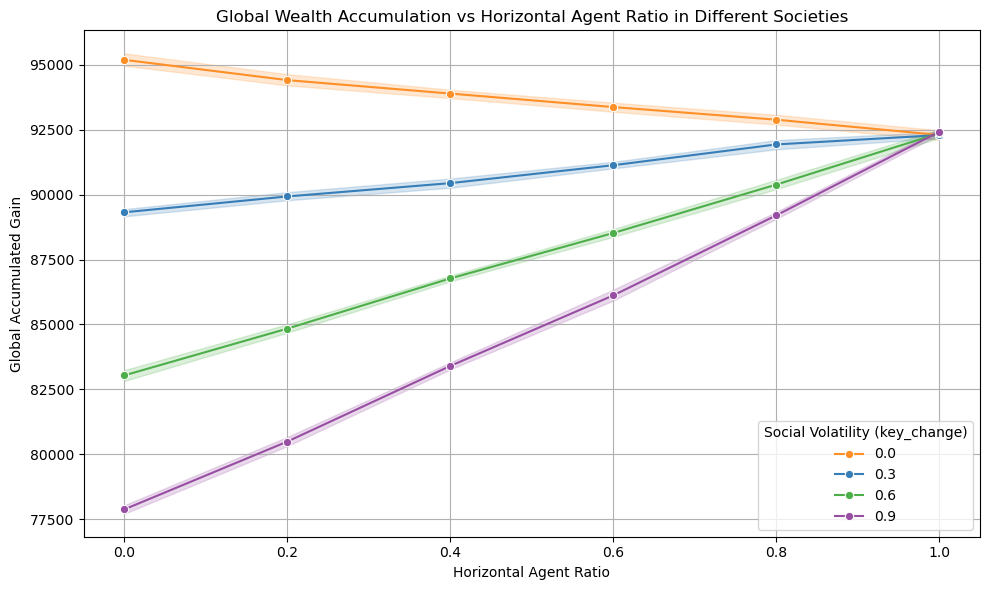

In [25]:
results_df_3['key_change'] = results_df_3['key_change'].astype(str)

plt.figure(figsize=(10,6))

custom_palette = ["#ff8f27", '#377eb8', '#4daf4a', '#984ea3'] 
sns.set_palette(custom_palette)

sns.lineplot(
    data=results_df_3,
    x='horizontal_ratio',
    y='Accumulated_Gain',
    hue='key_change',
    marker='o',
    errorbar='ci'
)

plt.title('Global Wealth Accumulation vs Horizontal Agent Ratio in Different Societies')
plt.xlabel('Horizontal Agent Ratio')
plt.ylabel('Global Accumulated Gain')
plt.grid(True)
plt.legend(title='Social Volatility (key_change)')
plt.tight_layout()

plt.savefig('global_wealth_vs_horizontal_ratio_with_bar_ci.png', dpi=300, bbox_inches='tight')
plt.show()
